<a href="https://colab.research.google.com/github/rranjithkumar100/AI-Training/blob/main/Day_30_Logistical_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Customer+List.csv to Customer+List.csv


In [3]:
df = pd.read_csv('Customer+List.csv')

In [4]:
df.head()

,Customer ID,Gender,Age,Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0


In [5]:
df.tail()

,Customer ID,Gender,Age,Salary,Purchased
395,396,Female,46,41000,1
396,397,Male,51,23000,1
397,398,Female,50,20000,1
398,399,Male,36,33000,0
399,400,Female,49,36000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  400 non-null    int64 
 1   Gender       400 non-null    object
 2   Age          400 non-null    int64 
 3   Salary       400 non-null    int64 
 4   Purchased    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# Label encoding


from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [8]:
df1 = df.copy()

In [9]:
df1['Gender'] = le.fit_transform(df1['Gender'])


In [10]:
df1

,Customer ID,Gender,Age,Salary,Purchased
0,1,1,19,19000,0
1,2,1,35,20000,0
2,3,0,26,43000,0
3,4,0,27,57000,0
4,5,1,19,76000,0
...,...,...,...,...,...
395,396,0,46,41000,1
396,397,1,51,23000,1
397,398,0,50,20000,1
398,399,1,36,33000,0


In [13]:
df1 = df1.drop('Customer ID',axis=1)

In [14]:
df1

,Gender,Age,Salary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Gender     400 non-null    int64
 1   Age        400 non-null    int64
 2   Salary     400 non-null    int64
 3   Purchased  400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [17]:
x = df1.iloc[:,0:3]
y = df1.iloc[:,3:4]

In [18]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [16]:
from sklearn.model_selection import train_test_split


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=3)


In [20]:
x_train.shape

(280, 3)

In [21]:
x_test.shape

(120, 3)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_predict = model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

In [27]:
cm

array([[72,  6],
       [15, 27]])

In [28]:
import seaborn as sns

<Axes: >

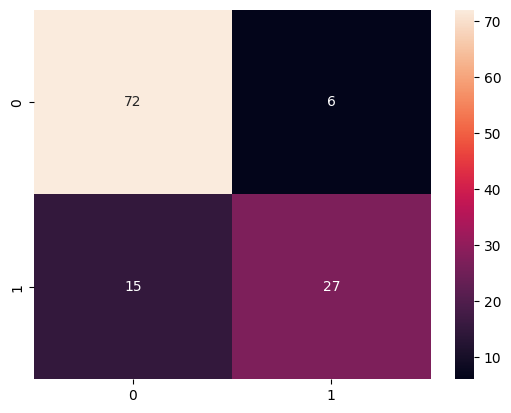

In [29]:
sns.heatmap(cm,annot=True)

In [30]:
x_test.shape

(120, 3)

In [31]:
var_prob = model.predict_proba(x_test)


In [ ]:
var_prob

In [33]:
var_prob[0,:]

array([0.24165292, 0.75834708])